In [53]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [54]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# 分類数設定

In [55]:
NUM_CLASSES = 10

# 学習データ読み込み

In [56]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [57]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [59]:
# Model building
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [60]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dropout_6 (Dropout)                  │ (None, 42)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 20)                  │             860 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             110 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,180 (4.61 KB)

 Trainable params: 1,180 (4.61 KB)

 Non-trainable params: 0 (0.00 B)

In [61]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [62]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [63]:
# Model training
model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1406 - loss: 2.2931
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.1406 - loss: 2.2931 - val_accuracy: 0.0909 - val_loss: 2.3391
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.0938 - loss: 2.2743
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.0938 - loss: 2.2743 - val_accuracy: 0.0455 - val_loss: 2.3360
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.1094 - loss: 2.2954
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.1094 - loss: 2.2954 - val_accuracy: 0.0455 - val_loss: 2.3339
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.1719 - loss: 2.2519
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.keras
1/1 ━━━━━━━━━━━━

In [64]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.3182 - loss: 1.7340


In [65]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [66]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
[0.14375468 0.21153602 0.1256461  0.12431057 0.08514095 0.12822086
 0.04370913 0.04578803 0.05073116 0.04116251]
1


# 混同行列

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


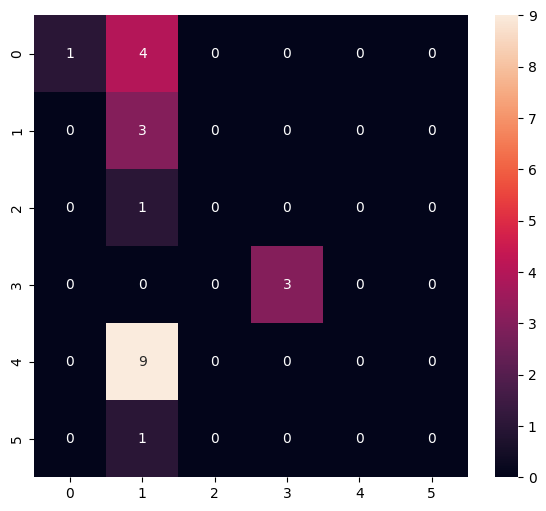

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.20      0.33         5
           1       0.17      1.00      0.29         3
           2       0.00      0.00      0.00         1
           3       1.00      1.00      1.00         3
           4       0.00      0.00      0.00         9
           5       0.00      0.00      0.00         1

    accuracy                           0.32        22
   macro avg       0.36      0.37      0.27        22
weighted avg       0.39      0.32      0.25        22



C:\Users\gunna\Downloads\hand-gesture-recognition-mediapipe-main\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gunna\Downloads\hand-gesture-recognition-mediapipe-main\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gunna\Downloads\hand-gesture-recognition-mediapipe-main\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter t

In [67]:
# Confusion matrix
def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_true, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [68]:
# Convert to model for TensorFlow-Lite
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [69]:
# Transform model (quantization)
def convert_to_tflite(model_path, tflite_save_path):
    model = tf.keras.models.load_model(model_path)
    converter = tf.lite.TFLiteConverter.from_keras_model(model)
    converter.optimizations = [tf.lite.Optimize.DEFAULT]
    tflite_quantized_model = converter.convert()
    with open(tflite_save_path, 'wb') as f:
        f.write(tflite_quantized_model)

convert_to_tflite(model_save_path, tflite_save_path)

AttributeError: 'Sequential' object has no attribute '_get_save_spec'

# 推論テスト

In [ ]:
# Inference test with TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [ ]:
# Get I/O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [ ]:
# Set input tensor
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]], dtype=np.float32))

In [ ]:
# Inference implementation
interpreter.invoke()
# Get output tensor
tflite_results = interpreter.get_tensor(output_details[0]['index'])

In [ ]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))